# Amery paper manual surface picking - data processing

Data was acquired from user input using the following notebook: 

<p><a href="https://mybinder.org/v2/gh/fliphilipp/pondpicking/master?filepath=manualPondPicking.ipynb">
         <img alt="Binder" src="https://mybinder.org/badge_logo.svg" width="130" height="70" style="float:left"></a></p><br>
         
<p><a href="https://github.com/fliphilipp/pondpicking">
         <img alt="Binder" src="https://github.githubassets.com/images/modules/logos_page/GitHub-Logo.png" width="130" height="70" style="float:left"></a></p><br>

## imports

In [1]:
%matplotlib notebook
import copy
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
from os import listdir, makedirs
from os.path import isfile, join, exists
from scipy.io import loadmat
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings("ignore",category=RuntimeWarning)

## list all MATLAB files

In [2]:
datapath = 'data/pondPickingResults/'
matfilelist = [datapath+f for f in listdir(datapath) if isfile(join(datapath, f)) & ('.mat' in f)]
print('number of MATLAB files: ' + str(len(matfilelist)))
for f in matfilelist: print(f)

number of MATLAB files: 11
data/pondPickingResults/pickedData_BenniBirner.mat
data/pondPickingResults/pickedData_ClaireStone.mat
data/pondPickingResults/pickedData_DanielKongsgaard.mat
data/pondPickingResults/pickedData_DanielKroes.mat
data/pondPickingResults/pickedData_JulianSpergel.mat
data/pondPickingResults/pickedData_MayaBecker.mat
data/pondPickingResults/pickedData_PhilippArndt.mat
data/pondPickingResults/pickedData_SusanHoward.mat
data/pondPickingResults/pickedData_SusheelAdusumilli.mat
data/pondPickingResults/pickedData_TheresaMorrison.mat
data/pondPickingResults/pickedData_ZachFair.mat


## convert MATLAB files to CSV for consistency

In [3]:
for fn in matfilelist:
    fnout = fn.replace('.mat','.csv').replace('pickedData_','pondPicking-')
    print('writing: ' + fnout,end=': ')
    f = open(fnout, "w")
    f.write("lat,h,pondid,typeid\n")
    matdat = loadmat(fn)
    for pond in np.arange(1,5):
        for part in np.arange(1,4):
            lat = matdat['pickedData'][0][pond-1][0][(part-1)*2]
            h = matdat['pickedData'][0][pond-1][0][(part-1)*2+1]
            if len(lat) > 1:
                for i in range(len(lat)):
                    if (part == 3) & (i == 0):
                        f.write(",,%d,%d\n" % (pond,2))
                    f.write("%.10f,%.10f,%d,%d\n" % (lat[i][0],h[i][0],pond,min(part,2)))
    f.close()
    print(' ---> done!')

writing: data/pondPickingResults/pondPicking-BenniBirner.csv:  ---> done!
writing: data/pondPickingResults/pondPicking-ClaireStone.csv:  ---> done!
writing: data/pondPickingResults/pondPicking-DanielKongsgaard.csv:  ---> done!
writing: data/pondPickingResults/pondPicking-DanielKroes.csv:  ---> done!
writing: data/pondPickingResults/pondPicking-JulianSpergel.csv:  ---> done!
writing: data/pondPickingResults/pondPicking-MayaBecker.csv:  ---> done!
writing: data/pondPickingResults/pondPicking-PhilippArndt.csv:  ---> done!
writing: data/pondPickingResults/pondPicking-SusanHoward.csv:  ---> done!
writing: data/pondPickingResults/pondPicking-SusheelAdusumilli.csv:  ---> done!
writing: data/pondPickingResults/pondPicking-TheresaMorrison.csv:  ---> done!
writing: data/pondPickingResults/pondPicking-ZachFair.csv:  ---> done!


## list all CSV files

In [4]:
filelist = [datapath+f for f in listdir(datapath) if isfile(join(datapath, f))  & ('.csv' in f)]
print('number of CSV files: ' + str(len(filelist)))
for f in filelist: print(f)

number of CSV files: 56
data/pondPickingResults/pondPicking-AlexGardner.csv
data/pondPickingResults/pondPicking-AnjaliNarayanan.csv
data/pondPickingResults/pondPicking-BenniBirner.csv
data/pondPickingResults/pondPicking-BenODwyer.csv
data/pondPickingResults/pondPicking-CanyonBreyer.csv
data/pondPickingResults/pondPicking-ClaireStone.csv
data/pondPickingResults/pondPicking-DaleBardin.csv
data/pondPickingResults/pondPicking-DanielKongsgaard.csv
data/pondPickingResults/pondPicking-DanielKroes.csv
data/pondPickingResults/pondPicking-DebGardner.csv
data/pondPickingResults/pondPicking-DerrickLeong.csv
data/pondPickingResults/pondPicking-DiannaSantiago.csv
data/pondPickingResults/pondPicking-ElizabethNgo.csv
data/pondPickingResults/pondPicking-EllenBuckley.csv
data/pondPickingResults/pondPicking-EricaDeBiasio.csv
data/pondPickingResults/pondPicking-FarouqFardan.csv
data/pondPickingResults/pondPicking-HaydenJohnson.csv
data/pondPickingResults/pondPicking-HelenAmanda.csv
data/pondPickingResults

## define class for pond data

In [5]:
class pondDataBucket:
    def __init__(self, pond):
        'get pond data and initialize plot'
        
        # get pond data from Open Altimetry
        import numpy as np
        import matplotlib.pylab as plt
        import json
        import requests
        self.pond = pond
        if pond == 1:
            self.latlims = [-72.9969, -72.9890]
            self.lonlims = [67.2559, 67.2597]
            self.hlims = [217, 224]
        elif pond == 2: 
            self.latlims = [-72.8937, -72.8757]
            self.lonlims = [67.3046, 67.3131]
            self.hlims = [204, 212]
        elif pond == 3: 
            self.latlims = [-71.8767, -71.8669]
            self.lonlims = [67.7598, 67.7640]
            self.hlims = [89, 98]
        elif pond == 4: 
            self.latlims = [-71.6481, -71.6376]
            self.lonlims = [67.8563, 67.8608]
            self.hlims = [76, 88]
        self.url = 'https://openaltimetry.org/data/api/icesat2/atl03?minx={minx}&miny={miny}&maxx={maxx}&maxy={maxy}&trackId=81&beamName=gt2l&outputFormat=json&date=2019-01-02&client=jupyter'
        self.url = self.url.format(minx=self.lonlims[0],miny=self.latlims[0],maxx=self.lonlims[1],maxy=self.latlims[1])
        print('requesting data for pond', str(pond), ': ', self.url)
        self.conf_ph = ['Noise', 'Buffer', 'Low', 'Medium', 'High']
        r = requests.get(self.url)
        self.data = r.json()
        self.lat_ph = []
        self.lon_ph = []
        self.h_ph = []
        for beam in self.data:
            for photons in beam['series']:
                if any(word in photons['name'] for word in self.conf_ph):
                    for p in photons['data']:
                        self.lat_ph.append(p[0])
                        self.lon_ph.append(p[1])
                        self.h_ph.append(p[2])
        self.col_photons = np.array([[0.25, 0.25, 0.25]])
        self.col_surface = 'b'
        self.col_bottom = np.array([252, 3, 73]) / 255

## compile ponddata

In [6]:
ponddata = []
for i in np.arange(1,5):
    ponddata.append(pondDataBucket(i))

requesting data for pond 1 :  https://openaltimetry.org/data/api/icesat2/atl03?minx=67.2559&miny=-72.9969&maxx=67.2597&maxy=-72.989&trackId=81&beamName=gt2l&outputFormat=json&date=2019-01-02&client=jupyter
requesting data for pond 2 :  https://openaltimetry.org/data/api/icesat2/atl03?minx=67.3046&miny=-72.8937&maxx=67.3131&maxy=-72.8757&trackId=81&beamName=gt2l&outputFormat=json&date=2019-01-02&client=jupyter
requesting data for pond 3 :  https://openaltimetry.org/data/api/icesat2/atl03?minx=67.7598&miny=-71.8767&maxx=67.764&maxy=-71.8669&trackId=81&beamName=gt2l&outputFormat=json&date=2019-01-02&client=jupyter
requesting data for pond 4 :  https://openaltimetry.org/data/api/icesat2/atl03?minx=67.8563&miny=-71.6481&maxx=67.8608&maxy=-71.6376&trackId=81&beamName=gt2l&outputFormat=json&date=2019-01-02&client=jupyter


## function for plotting individual estimates

In [7]:
%matplotlib notebook

def plotPickedResults(fn,out):
    df = pd.read_csv(fn)
    thisName = fn[fn.find('-')+1:fn.find('.csv')]

    # plot all data
    fig = plt.figure(figsize=[9, 6])
    for ipond,p in enumerate(ponddata):
        thispond = ipond+1
        issurf = (df.pondid == thispond) & (df.typeid == 1)
        isbott = (df.pondid == thispond) & (df.typeid == 2)
        xsurf = df.lat[issurf]
        ysurf = df.h[issurf]
        xbott = df.lat[isbott]
        ybott = df.h[isbott]
        ax = fig.add_subplot(2,2,thispond)
        ax.set_title('pond ' + str(thispond) + ' (track 81, beam gt2l, 2019-01-02)',size=8)
        ax.set_xlabel('latitude',size=8)
        ax.set_ylabel('elevation [m]',size=8)
        ax.tick_params(axis='both', which='major', labelsize=6)
        ax.scatter(p.lat_ph,p.h_ph,s=10,c=p.col_photons,alpha=0.2,edgecolors='none')
        ax.plot(xsurf,ysurf,c=p.col_surface)
        ax.plot(xbott,ybott,c=p.col_bottom)
        ax.set_xlim((p.latlims[0], p.latlims[1]))
        ax.set_ylim((p.hlims[0], p.hlims[1]))
    fig.suptitle('Manually picked pond surfaces:' + thisName, fontsize=12,y=1.0)
    fig.tight_layout()

    outname = out + '-' + thisName + '.png'
    thisdir = outname[:outname.rfind('/')]
    if not exists(thisdir):
        makedirs(thisdir)
    fig.savefig(outname, dpi=300, facecolor='w', edgecolor='k')
    plt.close(fig)
    return outname

## Plot all CSV file data and save plots

In [8]:
%matplotlib inline

figNames = []
pickfigpath = datapath+'pondPickingFigs/'
if not exists(pickfigpath):
    makedirs(pickfigpath)
figPath = datapath+'pondPickingFigs/pondPickingFig'
for fn in filelist:
    if '.csv' in fn:
        figname = plotPickedResults(fn,out=figPath)
        print('write to file: ' + figname)
        figNames.append(figname)

write to file: data/pondPickingResults/pondPickingFigs/pondPickingFig-AlexGardner.png
write to file: data/pondPickingResults/pondPickingFigs/pondPickingFig-AnjaliNarayanan.png
write to file: data/pondPickingResults/pondPickingFigs/pondPickingFig-BenniBirner.png
write to file: data/pondPickingResults/pondPickingFigs/pondPickingFig-BenODwyer.png
write to file: data/pondPickingResults/pondPickingFigs/pondPickingFig-CanyonBreyer.png
write to file: data/pondPickingResults/pondPickingFigs/pondPickingFig-ClaireStone.png
write to file: data/pondPickingResults/pondPickingFigs/pondPickingFig-DaleBardin.png
write to file: data/pondPickingResults/pondPickingFigs/pondPickingFig-DanielKongsgaard.png
write to file: data/pondPickingResults/pondPickingFigs/pondPickingFig-DanielKroes.png
write to file: data/pondPickingResults/pondPickingFigs/pondPickingFig-DebGardner.png
write to file: data/pondPickingResults/pondPickingFigs/pondPickingFig-DerrickLeong.png
write to file: data/pondPickingResults/pondPick

## show all the raw data individually

In [9]:
figpath = datapath+'pondPickingFigs/'
figlist = [figpath+f for f in listdir(figpath) if isfile(join(figpath, f))  & ('.png' in f) & ('pondPickingFig' in f)]
print('number of PNG files: ' + str(len(figlist)))
mdstr = '<table>\n'
for i,f in enumerate(figlist):
    if (i % 2) is 0:
        mdstr += '<tr>\n'
    mdstr += '    <td><img src="%s" alt="%s" style="width: 450px;"/></td>\n' % (f,f)
    if (i % 2) is 1:
        mdstr += '<tr/>\n'
mdstr += '</table>'
display(Markdown(mdstr))

number of PNG files: 56


<table>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-AlexGardner.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-AlexGardner.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-AnjaliNarayanan.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-AnjaliNarayanan.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-BenniBirner.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-BenniBirner.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-BenODwyer.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-BenODwyer.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-CanyonBreyer.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-CanyonBreyer.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-ClaireStone.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-ClaireStone.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-DaleBardin.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-DaleBardin.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-DanielKongsgaard.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-DanielKongsgaard.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-DanielKroes.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-DanielKroes.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-DebGardner.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-DebGardner.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-DerrickLeong.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-DerrickLeong.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-DiannaSantiago.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-DiannaSantiago.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-ElizabethNgo.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-ElizabethNgo.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-EllenBuckley.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-EllenBuckley.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-EricaDeBiasio.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-EricaDeBiasio.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-FarouqFardan.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-FarouqFardan.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-HaydenJohnson.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-HaydenJohnson.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-HelenAmanda.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-HelenAmanda.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-JacobMorgan.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-JacobMorgan.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-JamesKasic.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-JamesKasic.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-JamesKMuller.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-JamesKMuller.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-JonnyKingslake.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-JonnyKingslake.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-JonnyKingslakeDad.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-JonnyKingslakeDad.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-JulianSpergel.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-JulianSpergel.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-JulieGevorgian.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-JulieGevorgian.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-KaitlinHarbeck.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-KaitlinHarbeck.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-KamFung.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-KamFung.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-KeithReeves.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-KeithReeves.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-LukeColosi.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-LukeColosi.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-MargaretMorris.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-MargaretMorris.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-MarkFlanner.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-MarkFlanner.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-MatthewCosta.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-MatthewCosta.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-MatthewKehrli.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-MatthewKehrli.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-MattLuongo.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-MattLuongo.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-MattSprague.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-MattSprague.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-MayaBecker.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-MayaBecker.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-MichaelJadovitz.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-MichaelJadovitz.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-MitchellChandler.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-MitchellChandler.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-MyLy.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-MyLy.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-NatashaMorganWitts.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-NatashaMorganWitts.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-NicholasHolschuh.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-NicholasHolschuh.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-NickOzanich.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-NickOzanich.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-PamelaNance.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-PamelaNance.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-PatrickNaylor.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-PatrickNaylor.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-PhilippArndt.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-PhilippArndt.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-RachelTam.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-RachelTam.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-RialsChristensen.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-RialsChristensen.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-RyleyHill.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-RyleyHill.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-SusanHoward.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-SusanHoward.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-SusheelAdusumilli.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-SusheelAdusumilli.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-TheresaMorrison.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-TheresaMorrison.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-TomMosbeux.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-TomMosbeux.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-TonyMartino.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-TonyMartino.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-ZachFair.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-ZachFair.png" style="width: 450px;"/></td>
<tr/>
<tr>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-ZhuolaiPan.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-ZhuolaiPan.png" style="width: 450px;"/></td>
    <td><img src="data/pondPickingResults/pondPickingFigs/pondPickingFig-ZoeYin.png" alt="data/pondPickingResults/pondPickingFigs/pondPickingFig-ZoeYin.png" style="width: 450px;"/></td>
<tr/>
</table>

## compile data and make some individual adjustments

In [10]:
filelist = [datapath+f for f in listdir(datapath) if isfile(join(datapath, f))  & ('.csv' in f)]

# these people picked the surface where there's not water present (didn't really follow the instructions)
# ...so need to fix up these
correctsurf = ['AlexGardner',
               'NicholasHolschuh',
               'MattLuongo',
               'JonnyKingslakeDad']

surfswitcher = {1: 221.7, 2: 209.7, 3: 95.2, 4: 84.8}
nanswitcher = {1: [-72.9966, -72.9937, -72.9919, -72.9896],
               2: [-72.8930, -72.8824, -72.8817, -72.8796],
               3: [-71.8761, -71.8736, -71.8686, -71.8674],
               4: [-71.6470, -71.6407]}
lat_step = 0.00001

names = []
for fn in filelist:
    if '.csv' in fn:
        thisName = fn[fn.find('-')+1:fn.find('.csv')]
        names.append(thisName)

for ipond,p in enumerate(ponddata):
    p.names = names
    p.lat_step = lat_step
    p.lats_int = np.arange(p.latlims[0],p.latlims[1],lat_step)
    b = nanswitcher[ipond+1]
    if len(b) == 4:
        p.is_in_pond = (((p.lats_int>b[0]) & (p.lats_int<b[1])) | ((p.lats_int>b[2]) & (p.lats_int<b[3])))
    elif len(b) == 2:
        p.is_in_pond = ((p.lats_int>b[0]) & (p.lats_int<b[1]))
    p.surface = np.full((len(p.names), len(p.lats_int)), np.nan)
    p.bottom = np.full_like(p.surface, np.nan)
    p.depth = np.full_like(p.surface, np.nan)
    p.keep_nans = np.full_like(p.surface, np.nan, dtype=np.bool)

# go through each person's file
for ifn, fn in enumerate(filelist):
    if '.csv' in fn:
        df = pd.read_csv(fn)
        
        # go through each pond
        for ipond,p in enumerate(ponddata):
            thispond = ipond+1
            issurf = (df.pondid == thispond) & (df.typeid == 1)
            isbott = (df.pondid == thispond) & (df.typeid == 2)
            xsurf = df.lat[issurf]
            ysurf = df.h[issurf]
            xbott = df.lat[isbott]
            ybott = df.h[isbott]
            thresh = surfswitcher[thispond]
            p.lats_int = np.arange(p.latlims[0],p.latlims[1],lat_step)
            
            # order mitchell's data (I really did not anticipate anyone would go right to left when picking...)
            if 'MitchellChandler' in fn:
                if thispond == 1:
                    br = 24
                    xbott = np.hstack((xbott[br:], np.flip(xbott[:br])))
                    ybott = np.hstack((ybott[br:], np.flip(ybott[:br])))
                if thispond == 3:
                    br = 21
                    xbott[br:] = np.flip(xbott[br:])
                    ybott[br:] = np.flip(ybott[br:])
            
            # get rid of extra surface where present
            if np.any([nm in fn for nm in correctsurf]):
                xsurf[ysurf>thresh] = np.nan
                ysurf[ysurf>thresh] = np.nan
                xbott[ybott>thresh] = np.nan
                ybott[ybott>thresh] = np.nan
            
            # get rid of "overhangs"
            d = np.diff(xbott)
            while np.nanmin(d) <= 0:
                d1 = list(d <= 0) + [False]
                d2 = [False] + list(d <= 0)
                xbott[d1] += (d[d<=0]/2 - 1e-12)
                xbott[d2] -= (d[d<=0]/2 - 1e-12)
                d = np.diff(xbott)
            
            # interpolate to fine grid and take elevation difference to obtain depth in ATL03 space
            surf_interp = np.interp(p.lats_int, xsurf, ysurf, left=np.nan, right=np.nan)
            bott_interp = np.interp(p.lats_int, xbott, ybott, left=np.nan, right=np.nan)
            p.keep_nans[ifn,:] = (np.isnan(bott_interp) & p.is_in_pond)
            surf_interp[np.isnan(bott_interp) & (~p.is_in_pond)] = np.nan
            p.surface[ifn,:] = surf_interp
            surf_interp[(np.isnan(surf_interp) & p.is_in_pond)] = np.nanmean(surf_interp)
            p.bottom[ifn,:] = bott_interp
            depth = surf_interp - bott_interp
            depth[depth<0] = 0
            p.depth[ifn,:] = depth

## divide up data into "ICESat-2 expert" and other folks' estimates

In [11]:
ISexperts = ['AlexGardner','EllenBuckley','HelenAmanda','KaitlinHarbeck','MarkFlanner','MayaBecker','NicholasHolschuh',
             'PhilippArndt','SusheelAdusumilli','TomMosbeux','TonyMartino','ZachFair']
IS2dict = {nm:(nm in ISexperts) for nm in names}
is2df = pd.DataFrame(list(zip(IS2dict.keys(), IS2dict.values())), columns=['name', 'is_IS2_expert'])
is2df.to_csv('is2list.csv',index=False)
is2df

,name,is_IS2_expert
0,AlexGardner,True
1,AnjaliNarayanan,False
2,BenniBirner,False
3,BenODwyer,False
4,CanyonBreyer,False
5,ClaireStone,False
6,DaleBardin,False
7,DanielKongsgaard,False
8,DanielKroes,False
9,DebGardner,False


## plot all estimates

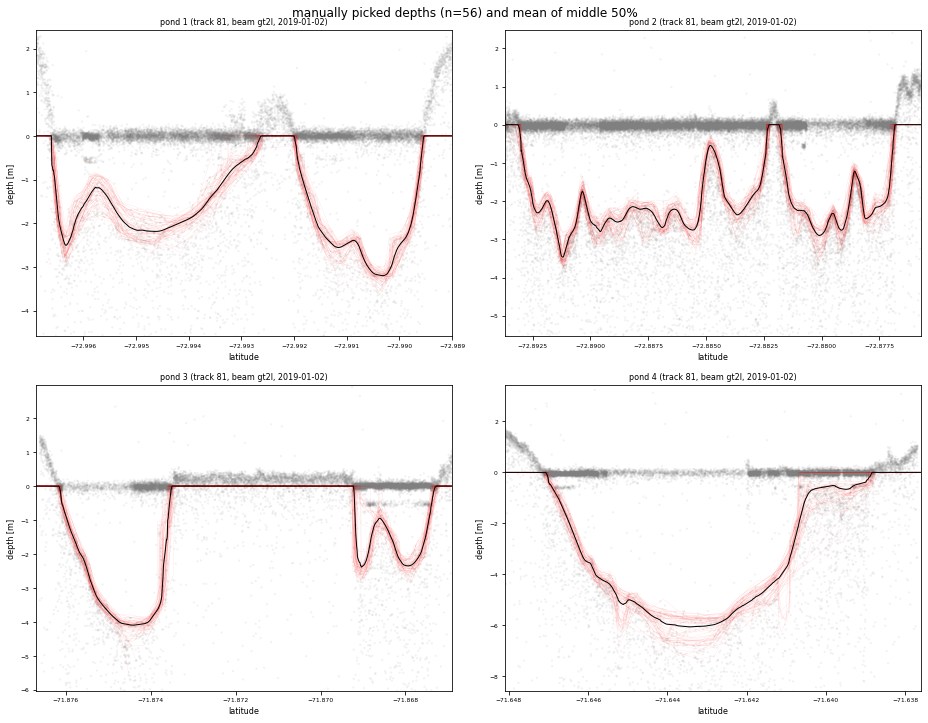

In [12]:
# get the median surface height for each pond to normalize ATL03 backround by this value
median_surf_norm = []
for ipond,p in enumerate(ponddata):
    median_surf_norm.append(np.nanmedian(p.surface))
median_surf_norm

fig = plt.figure(figsize=[13, 10])
for ipond,p in enumerate(ponddata):
    ax = fig.add_subplot(2,2,ipond+1)
    alldepths = np.full((len(p.lats_int),len(p.names)),np.nan)
    for iname, name in enumerate(p.names):
        depth_corr = p.depth[iname,:]
        depth_corr[np.isnan(depth_corr)] = 0
        depth_corr[p.keep_nans[iname,:]] = np.nan
        alldepths[:,iname] = depth_corr
    p.alldepths = alldepths
    m = np.nanmean(alldepths,axis=1) 
    n_est = len(p.names)
    lq = int(np.floor(n_est*0.25)-1)
    uq = int(np.ceil(n_est*0.75)-1)
    sortdepths = np.full((len(p.lats_int),uq-lq),np.nan)
    for i in range(sortdepths.shape[0]):
        sortdepths[i,:] = np.sort(alldepths[i,:])[lq:uq]
    mq = np.nanmean(sortdepths,axis=1)
    p.mean_midquartiles = mq
    std = np.nanstd(alldepths,axis=1)
    stdq = np.nanstd(sortdepths,axis=1)
    upper = m+std
    lower = m-std
    lower[lower<0] = 0
    upperq = mq+stdq
    lowerq = mq-stdq
    lowerq[lowerq<0] = 0
    ax.scatter(p.lat_ph,p.h_ph-median_surf_norm[ipond],s=5,c=[[0.5,0.5,0.5]],alpha=0.1,edgecolors='none')
    for iname, name in enumerate(p.names):
        ax.plot(p.lats_int, -alldepths[:,iname], 'r-', lw=0.2, alpha=0.2)
    ax.plot(p.lats_int,-mq,'k-',lw=1)
    ax.set_title('pond ' + str(ipond+1) + ' (track 81, beam gt2l, 2019-01-02)',size=8)
    ax.set_xlabel('latitude',size=8)
    ax.set_ylabel('depth [m]',size=8)
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.set_xlim((p.latlims[0], p.latlims[1]))
    ax.set_ylim((np.array(p.hlims)-median_surf_norm[ipond]))
fig.suptitle('manually picked depths (n=%i) and mean of middle 50%%' % n_est, fontsize=12,y=1.0)
fig.tight_layout()

## write to pickle

In [13]:
import pickle as pkl
pondlist = ['pond1', 'pond2','pond3','pond4']
pickingData = {k:{'median_surf_height':v} for (k,v) in zip(pondlist, median_surf_norm)}
pickingData['IS2experts'] = IS2dict
pickingData['nameList'] = list(IS2dict.keys())
pickingData['n_estimates'] = len(pickingData['nameList'])
for ipond,p in enumerate(ponddata):
    pond = pondlist[ipond]
    pickingData[pond]['lat_interp'] = p.lats_int
    pickingData[pond]['all_depths'] = p.alldepths
    pickingData[pond]['depth_mid2quartile_mean'] = p.mean_midquartiles
filename_out = 'data/amery_ponds_manual_picking_data.pkl'
with open(filename_out, 'wb') as handle:
    pkl.dump(pickingData, handle, protocol=pkl.HIGHEST_PROTOCOL)

### difference between mean ICESat-2 expert picks and remaining picks
(the difference is really small)

In [14]:
# is2 = is2df['is_IS2_expert']
# import scipy.stats

# mean_diff = []
# for ipond,p in enumerate(ponddata):
#     alldepths = np.full((len(p.lats_int),len(p.names)),np.nan)
#     for iname, name in enumerate(p.names):
#         depth_corr = p.depth[iname,:]
#         depth_corr[np.isnan(depth_corr)] = 0
#         depth_corr[p.keep_nans[iname,:]] = np.nan
#         alldepths[:,iname] = depth_corr
#     m_IS2 = np.nanmean(alldepths[:,is2],axis=1)
#     m_other = np.nanmean(alldepths[:,~is2],axis=1)
#     n = np.sum(is2)
#     std_IS2 = np.nanstd(alldepths[:,is2],axis=1) / np.sqrt(n)
#     n = np.sum(~is2)
#     std_other = np.nanstd(alldepths[:,~is2],axis=1) / np.sqrt(n)
#     upper_IS2 = m_IS2 + std_IS2
#     lower_IS2 = m_IS2 - std_IS2
#     lower_IS2[lower_IS2<0] = 0
#     upper_other = m_other + std_other
#     lower_other = m_other - std_other
#     lower_other[lower_other<0] = 0
#     mean_diff += list(m_IS2 - m_other)

-0.022060166266425152
0.06637178659318665


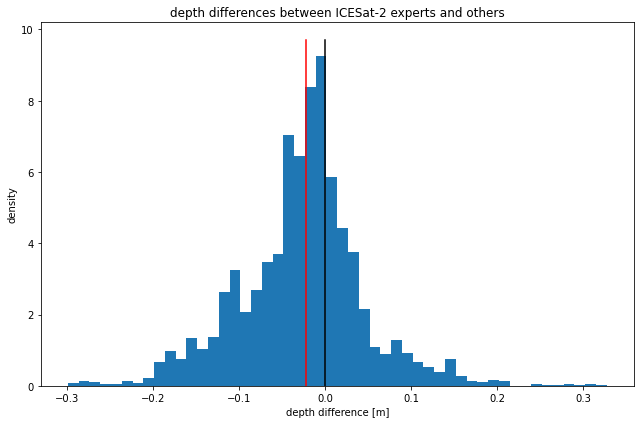

In [15]:
# mean_diff = np.array(mean_diff)
# mean_mean_diff = np.nanmean(mean_diff)
# def getCI(data, confidence=0.95):
#     m = np.nanmean(data)
#     n = len(data)
#     se = np.nanstd(data) / np.sqrt(60)
#     h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
#     return m, m-h, m+h
# m,l,u = getCI(mean_diff)
# fig = plt.figure(figsize=[9, 6])
# ax = fig.add_subplot(1,1,1)
# ax.hist(x=mean_diff[mean_diff!=0],bins=50,density=True)
# ax.set_title('depth differences between ICESat-2 experts and others')
# ax.set_xlabel('depth difference [m]')
# ax.set_ylabel('density')
# yl = ax.get_ylim()
# ax.plot([m,m],yl,'r-')
# ax.plot([0,0],yl,'k-')
# print(mean_mean_diff)
# print(np.std(mean_diff))
# fig.tight_layout()

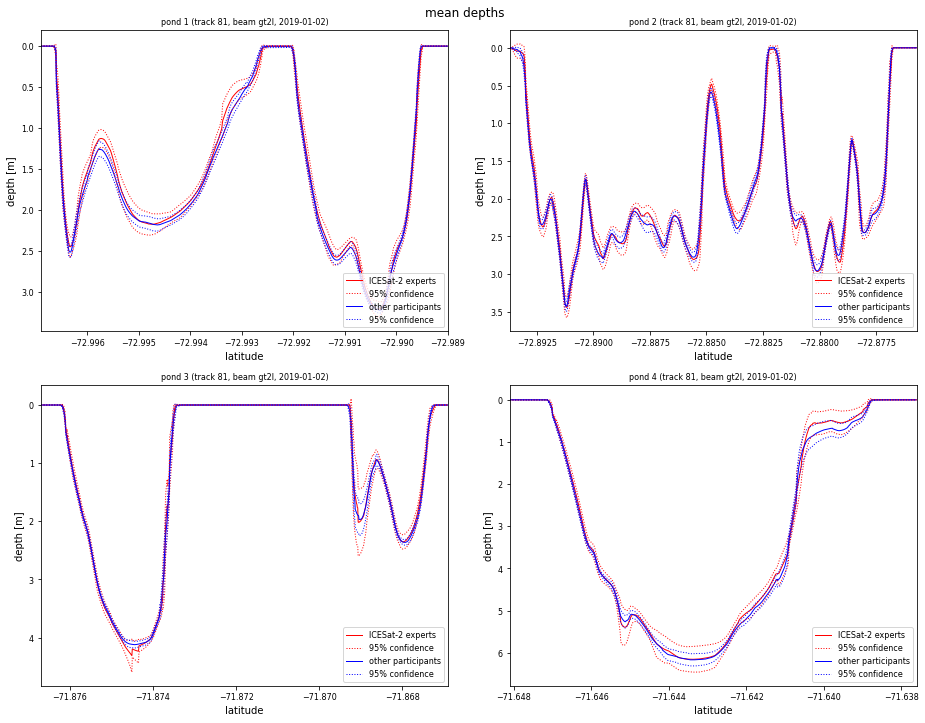

In [16]:
# fig = plt.figure(figsize=[13, 10])
# is2 = is2df['is_IS2_expert']
# import scipy.stats

# def mean_confidence_interval(data, confidence=0.95):
#     m = np.nanmean(data,axis=1)
#     n = data.shape[1]
#     se = np.nanstd(data,axis=1) / np.sqrt(n)
#     h = np.array([err * scipy.stats.t.ppf((1 + confidence) / 2., n-1) for err in se])
#     return m, m-h, m+h

# for ipond,p in enumerate(ponddata):
#     ax = fig.add_subplot(2,2,ipond+1)
#     alldepths = np.full((len(p.lats_int),len(p.names)),np.nan)
#     for iname, name in enumerate(p.names):
#         depth_corr = p.depth[iname,:]
#         depth_corr[np.isnan(depth_corr)] = 0
#         depth_corr[p.keep_nans[iname,:]] = np.nan
#         alldepths[:,iname] = depth_corr
    
#     m_IS2, lower_IS2, upper_IS2 = mean_confidence_interval(alldepths[:,is2])
#     m_other, lower_other, upper_other = mean_confidence_interval(alldepths[:,~is2])
    
#     p1, = ax.plot(p.lats_int,m_IS2,'r-',lw=1, label='ICESat-2 experts')
#     p3, = ax.plot(p.lats_int,m_other,'b-',lw=1, label= 'other participants')
#     p2, = ax.plot(p.lats_int,upper_IS2,'r:',lw=1, label='95% confidence')
#     ax.plot(p.lats_int,lower_IS2,'r:',lw=1)
#     p4, = ax.plot(p.lats_int,upper_other,'b:',lw=1, label='95% confidence')
#     ax.plot(p.lats_int,lower_other,'b:',lw=1)
#     ax.set_title('pond ' + str(ipond+1) + ' (track 81, beam gt2l, 2019-01-02)',size=8)
#     ax.set_xlabel('latitude',size=10)
#     ax.set_ylabel('depth [m]',size=10)
#     ax.tick_params(axis='both', which='major', labelsize=8)
#     ax.set_xlim((p.latlims[0], p.latlims[1]))
#     ax.set_ylim(ax.get_ylim()[::-1])
#     ax.legend(handles=[p1,p2,p3,p4],loc='lower right',fontsize=8)
# fig.suptitle('mean depths', fontsize=12,y=1.0)
# fig.tight_layout()

## look at differences for "overhangs" 
(looks like almost everyone went left to right, except MitchellChandler)

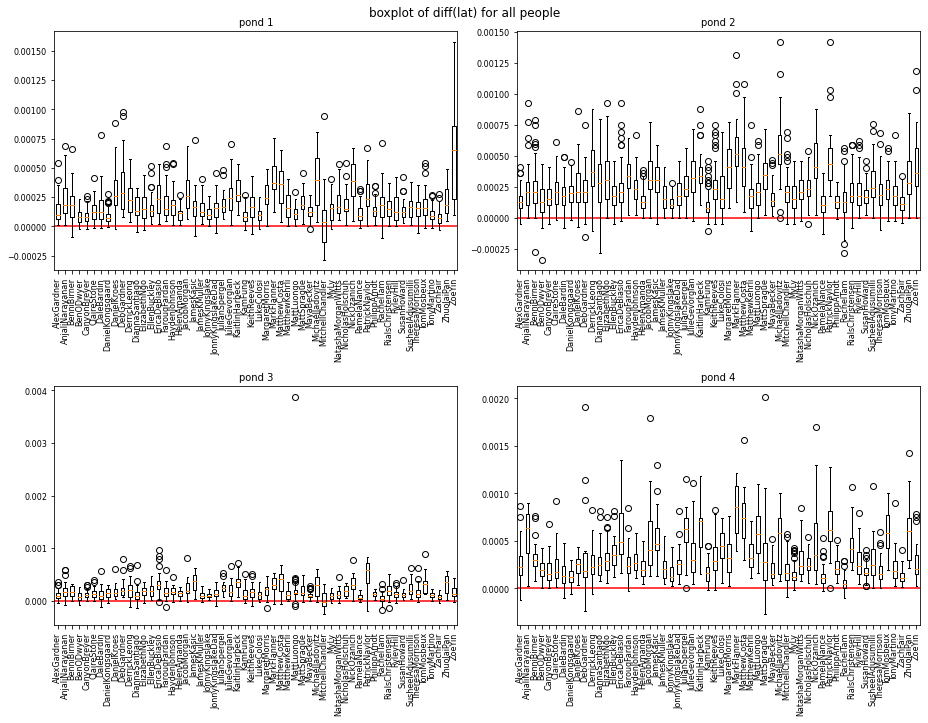

In [17]:
# datapath = 'data/pondPickingResults/'
# filelist = [datapath+f for f in listdir(datapath) if isfile(join(datapath, f))  & ('.csv' in f)]
# correctsurf = ['data/pondPickingResults/pondPicking-AlexGardner.csv',
#                'data/pondPickingResults/pondPicking-NicholasHolschuh.csv',
#                'data/pondPickingResults/pondPicking-MattLuongo.csv']
# switcher = {1: 221.7, 2: 209.7, 3: 95.2, 4: 84.8}
# xbottdiff = [[],[],[],[]]
# names = []
# for fn in filelist:
#     if '.csv' in fn:
#         df = pd.read_csv(fn)
#         thisName = fn[fn.find('-')+1:fn.find('.csv')]
#         names.append(thisName)
#         for thispond in np.arange(1,5):
#             isbott = (df.pondid == thispond) & (df.typeid == 2)
#             xbott = df.lat[isbott]
#             ybott = df.h[isbott]
#             if fn in correctsurf:
#                 thresh = switcher[thispond]
#                 xbott[ybott>thresh] = np.nan
#             differences = np.diff(xbott)
#             differences = differences[~np.isnan(differences)]
#             xbottdiff[thispond-1].append(differences)
            
# fig = plt.figure(figsize=[13, 10])
# for p in np.arange(1,5):
#     ax = fig.add_subplot(2,2,p)
#     ax.plot([0.5,len(names)+0.5],[0,0],'r-')
#     ax.boxplot(xbottdiff[p-1],labels=names)
#     plt.xticks(rotation=90)
#     ax.set_title('pond ' + str(p),size=10)
#     ax.tick_params(axis='both', which='major', labelsize=8)
# fig.suptitle('boxplot of diff(lat) for all people', fontsize=12,y=1.0)
# fig.tight_layout()